In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS

In [3]:
df = pd.read_csv("C:/Users/shishgup/Desktop/GBcomments.csv", error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [4]:
df.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


### Sentiment_Analysis

In [5]:
df[df.isna()]

,video_id,comment_text,likes,replies
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
718447,NaN,NaN,NaN,NaN
718448,NaN,NaN,NaN,NaN
718449,NaN,NaN,NaN,NaN
718450,NaN,NaN,NaN,NaN


In [6]:
df.dropna(inplace=True)

In [7]:
lst = []         #Blank_List_Initialisation
for i in df['comment_text']:
    lst.append(TextBlob(i).sentiment.polarity)

In [9]:
df['Polarity'] = lst

In [11]:
df.head()

,video_id,comment_text,likes,replies,Polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


In [12]:
positive_comments = df[df['Polarity'] == 1]

In [13]:
positive_comments.head()

,video_id,comment_text,likes,replies,Polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


In [16]:
total_comments = ' '.join(positive_comments['comment_text'])

In [17]:
total_comments

"Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The best thing to ever happen to iPhone Apple is always awesome \\n\\nhttps://youtu.be/rftzm6X1yP4 das a lot of edditing you have done there ... I like it :D Welcome to the Scandiworld! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. WHY DO I KEEP FREAKING LAUGHING EACH TIME I WATCH IT AGAIN ! even though I know how it will end. omg the best 😂 LIKE = MEET CELEBRITY \\nSUBSCRIBE = BECOME A BILLIONAIRE\\nSCROLL UP/DOWN = DEATH FOR YOU AND EVERYONE YOU LOVE!!!!!!!!!!!!!!!!!!!!!!!!!!!!! the sonic air timer was perfect no 16 on trending impressive My daughters name is lacey <3 I'm 17 and can proudly say Moon Dreamers was one of my favourite shows! if I could subscribe to Dude Perfect a million times I would You guys should make dude perfect sceets To be a dude perfect member it is so awesome .... 

In [30]:
words = WordCloud(height=500,width=1000,stopwords=set(STOPWORDS)).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

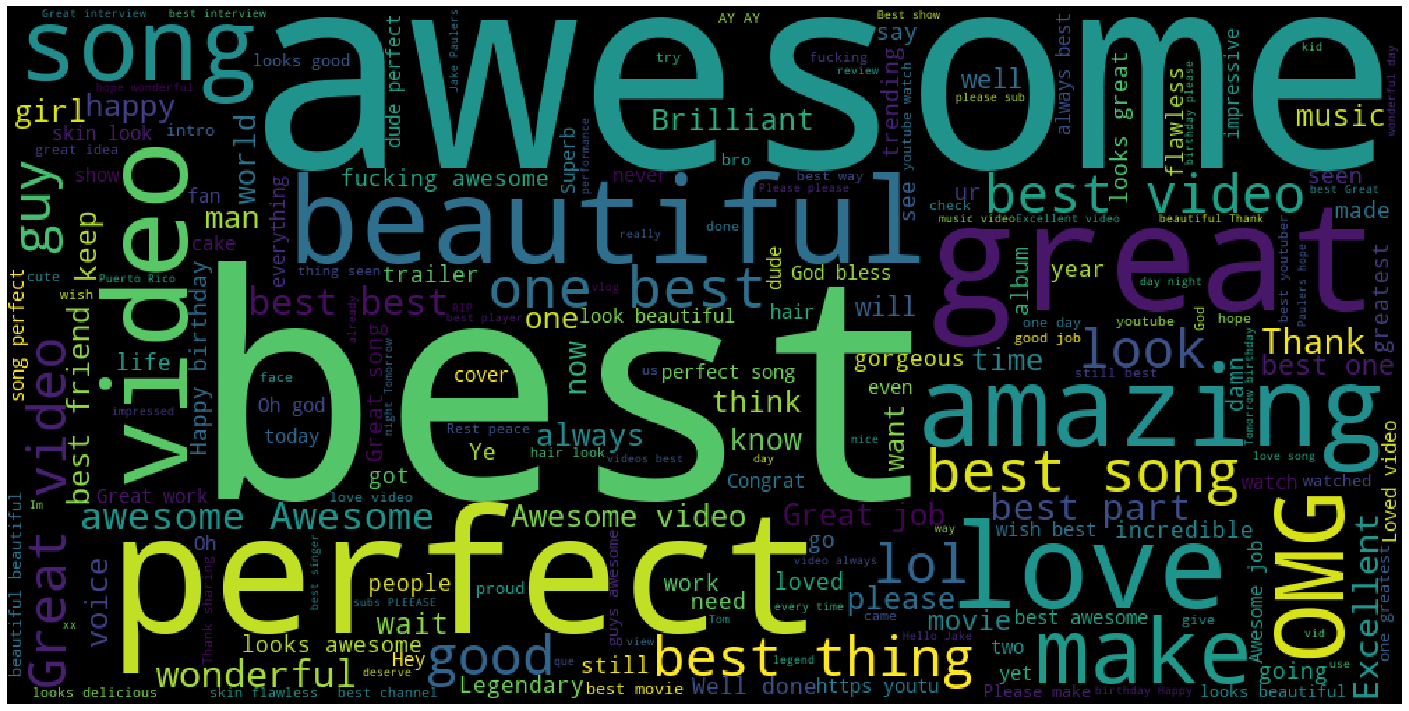

In [31]:
plt.figure(figsize=(25,15))
plt.imshow(words)
plt.axis('off')

In [32]:
negative_comments = df[df['Polarity'] == -1]

In [33]:
negative_words = ' '.join(negative_comments['comment_text'])
negative_words

"boring 0:22   **laughs at terrible pun** this is the worst thing i've heard. ever. People making jokes about 9/11 is truly disgusting. Hundreds of people died for God's sake - have some respect. Thats insane. How is this trending ? Awful Butthurt Sean, idiot! Nigga nigga nigga ni... Fucking.... Nigga!!!!!!!! Just gone and bought these bad boys!!!! ❤️❤️❤️❤️ had an alarm set in my phone and everything Please let this die, you can tell the actors are miserable. can't wait :'( Don't be bringing cucumbers to the theaters this time!! You know who you are, ya nasty Handmaids Tale was boring, I found I won't read this comment. What a Dick I am, I can't believe I just read this. I am pathetic! all the products are horrible jim carrey lost it, became a boring socialist hippy Winner Tacos were my favourite growing up too! People always thought I was insane when I described it amd kept on claiming that I was just misremembering Maxibons. Terrible, at times like this we need to come together not s

In [34]:
negative_word_cloud = WordCloud(stopwords=set(STOPWORDS)).generate(negative_words)

(-0.5, 399.5, 199.5, -0.5)

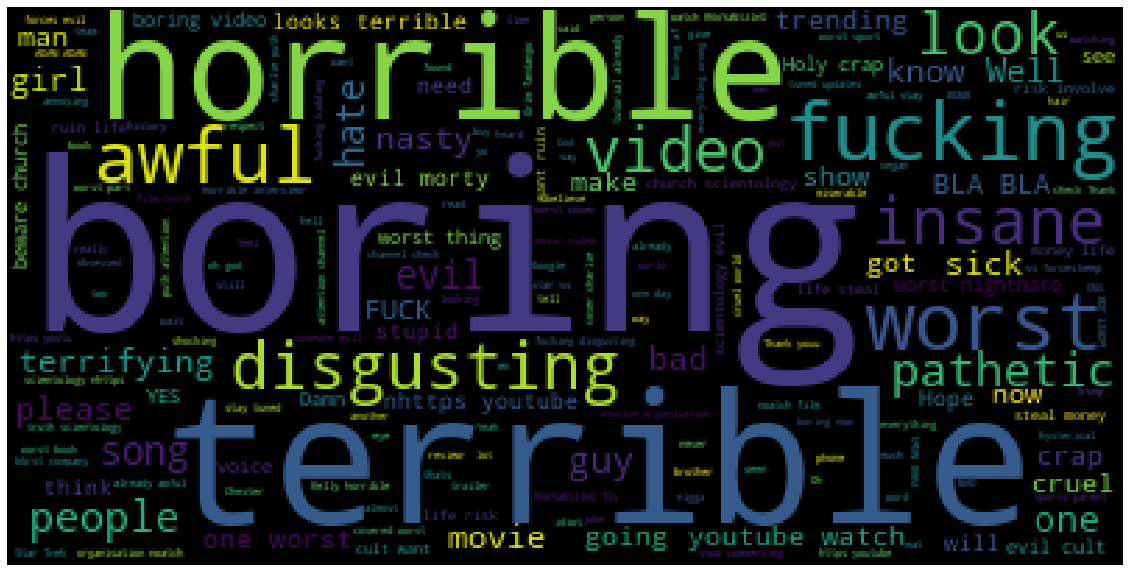

In [35]:
plt.figure(figsize=(20,12))
plt.imshow(negative_word_cloud)
plt.axis('off')